# Check between photon fields

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
C = const.c.cgs.value

I use Finke's expression for the photon fields at 
https://ui.adsabs.harvard.edu/abs/2016ApJ...830...94F/abstract

## Spherical Shell BLR
The energy density of the BLR reads Eq. (80):
$$
u_{\rm re}(\epsilon,\,\Omega_{\rm re}; R_{\rm li}) = \frac{\xi_{\rm li} L_{\rm disk}}{(4 \pi)^2 c}\,\delta(\epsilon - \epsilon_{\rm li}) 
\int_{-1}^{1}\;\frac{d \mu_{\rm re}}{x^2} \, \delta(\mu - \mu_*),
$$
where $\xi_{\rm li}$ is the fraction of the disk radiation reprocessed, $x$ is the distance of the reprocessing material to the blob, $r$ is the height of the blob above the BH. See Figure 9 of the paper
$$
x^2 = R_{\rm re}^2 + r^2 - 2 r R_{\rm re} \mu_{\rm re}.
$$
with $R_{\rm re} = R_{\rm li}$ in our case which is the radius of the spherical shell BLR.    
The delta functions are not relevant for the energy density of the target, they only enter the Compton kernel calculation.

In [17]:
def x_2(r, R_re, mu_re):
    return np.power(R_re, 2) + np.power(r, 2) - 2 * r * R_re * mu_re

def u_re_blr(r, L_disk, xi_li, R_li):
    mu = np.linspace(-1, 1, 200)
    prefactor = xi_li * L_disk / (np.power(4 * np.pi, 2) * C)
    # make it multidimensional
    # axis 0: r
    # axis 1: mu
    _r = r.reshape(r.size, 1)
    _mu = mu.reshape(1, mu.size)
    _x_2 = x_2(_r, R_li, _mu)
    _integrand = np.power(_x_2, -1)
    integral = np.trapz(_integrand, mu, axis=-1)
    return prefactor * integral

In [18]:
r = np.logspace(17.5, 19, 20) 
xi_li = 0.1 # erg s-1 as in JetSet default
L_disk = 1e45 # erg s-1 as in JetSet default
R_li =  1e18 # cm as in JetSet default

Text(8e+17, 1e-06, '$R_{\\rm li}$')

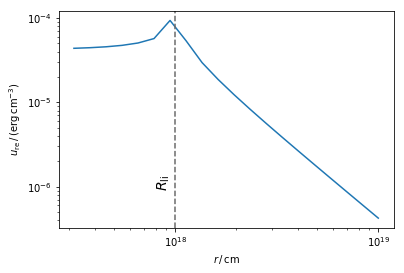

In [27]:
plt.loglog(r, u_re_blr(r, L_disk, xi_li, R_li))
plt.axvline(R_li, ls="--", color="dimgray")
plt.xlabel(r"$r\,/\,{\rm cm}$")
plt.ylabel(r"$u_{\rm re}\,/\,({\rm erg\,cm}^{-3})$")
plt.text(0.8*1e18, 1e-6, r"$R_{\rm li}$", rotation=90, fontsize=14)

## Ring Dust Torus
The energy density of the Torus reads Eq.(91):
$$
u_{\rm re}(\epsilon,\,\Omega) = 
\frac{\xi_{\rm dt} L_{\rm disk}}{(4 \pi)^2 c x^2}\,
\delta\left(\mu - \frac{r}{x} \right) \, \delta(\epsilon - \epsilon_{\rm dt}),
$$
Again the delta functions serves the Compton Kernel computations, $x$ in this case reads,
$$
x^2 = R^2_{\rm dt} + r^2,
$$
where $R_{\rm dt}$ is the disk radius and $r$ is the height of the blob above the jet.

In [24]:
def u_re_dt(r, L_disk, xi_dt, R_dt):
    x_2 = np.power(R_dt, 2) + np.power(r, 2)
    return xi_dt * L_disk / (np.power(4 * np.pi, 2) * C * x_2)

Text(4e+18, 2e-07, '$R_{\\rm dt}$')

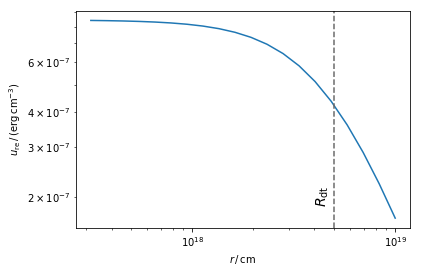

In [29]:
xi_dt = 0.1 # as in JetSet
R_dt = 5e18 # as in JetSet

plt.loglog(r, u_re_dt(r, L_disk, xi_dt, R_dt))
plt.axvline(R_dt, ls="--", color="dimgray")
plt.xlabel(r"$r\,/\,{\rm cm}$")
plt.ylabel(r"$u_{\rm re}\,/\,({\rm erg\,cm}^{-3})$")
plt.text(4e18, 2e-7, r"$R_{\rm dt}$", rotation=90, fontsize=14)